# 771768-Introduction to Programming for Artificial Intelligence and Data Science

# Module Assessment Using Customer Data Pre-processing

# Introduction 

### The below coding exercise is based on a collection of customer data (acw_user_data) presented by a company, to be to be processed and put into best value. The company system can only allow the data to be exported as csv file and as such expected to be pre-prossessed and put in a format that allows for further analysis.
### Once exported and loaded into python, the csv file presents 23 columns and 1000 rows with important and confidential attributes like customer name, address, company, credit card details, banking number, salary, pension, company name, commuting distance, and car details.
### The task involved is to reorganise the data by grouping into categories (such as putting all adress details: street, city and postcose, together) and creating new attributes and files where necessary ( following company instructions) so as to make it more meaningful. I am also expected to do some basic statistics and plot graphs that will give the company an overview of how the data behaves.

In [34]:
#In order to get started, I will first import all necessary libraries I will be needing in understanding and analysing the data

import numpy as np #For the handling and processing of numeric data
import pandas as pd #To help with data processing where necessary and permitted.
import seaborn as sns #To assist with data visualisation where necessary and permitted.
import matplotlib.pyplot as plt #To help with plotting and visualising data
import csv #For reading files and processing data
import json #For the writing and reading of json specific files.
import datetime as datetime #To help create date objects
import random #To assist with the generation of random numbers when needed.
import sys #This toolbox will assist with reading command line arguments and their iterations. # (Bar-Gil, 2023)
import re #To check whether a a given set of expression is a string and vice versa.
from decimal import Decimal #For accurate currency decimal handling
from scipy.stats import norm, expon, cauchy #for plots with fitted normal distribuition

# Data Processing

## Task 1

In [35]:
my_df = [] #To open an empty file which will serve as working file
with open("acw_user_data.csv", "r") as file:
    csvreader = csv.reader(file, delimiter = ",") # (Bonthu, 2024), (Python, 2024)
    for line in csvreader:
        my_df.append(line) #To load the data to the empty file
        
print(my_df) #To see the data

[['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type'], ['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup'], ['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe'], ['Studio 33K Joel walk', 'Randallborough', 'ME3N 1

## Task 2

In [36]:
#To have a view of the headers and the number of columns in the dataframe
header = []
with open("acw_user_data.csv") as file:
    csvreader = csv.reader(file, delimiter = ",")
    header = next(csvreader)

header

['Address Street',
 'Address City',
 'Address Postcode',
 'Age (Years)',
 'Distance Commuted to Work (Km)',
 'Employer Company',
 'Credit Card Start Date',
 'Credit Card Expiry Date',
 'Credit Card Number',
 'Credit Card CVV',
 'Dependants',
 'First Name',
 'Bank IBAN',
 'Last Name',
 'Marital Status',
 'Yearly Pension (GBP)',
 'Retired',
 'Yearly Salary (GBP)',
 'Sex',
 'Vehicle Make',
 'Vehicle Model',
 'Vehicle Year',
 'Vehicle Type']

In [37]:
#It can be seen from the above that there are 23 data columns

#To answer Task 2, I need to perform the following;
#1) define an arguments function of a dictionary, a list of keys of th dictionary, and variable.
#2) Define a second function (to be populated) of arguments to remove items from a dictionary list and allow for sorting the items.
#3) Make a list of required data for vehicles, credit cards, and addresses
#4) Use the above lists to populate the nested dictionaries (Vehicles, Credit Cards, and Addresses).
#5) Update the original dictionary to contain nested dictionaries created.

#
def mybool(value):
    return True if value == "True" else False
def myint(value):
    return None if value.strip() == "" else int(value)

#To create a dictionary that is to be populated using for loop (Ferreira, 2020)

def dict(my_dict, keys, row): #Defines a function of arguments, including variable name (row), a list of keys (keys), and the new dictionary(my_dict).
    my_dict = {} #To open or create and empty new dictionary in line with the above defined function.
    for key in keys:
        my_dict[key] = row[key]
    return my_dict

#I need to define another function that can remove items from a dictionary list using .pop(). (Gallagher, 2023)
def to__del(info, row):
    for i in info: #For keys (i) in the needed information list
        row.pop(i) #Delete key in dictionary
    return row #And return the row
    
for line in my_df:

    #To make a list of the needed nested dictionary items;
    Vehicle_info = {("Vehicle Make", str), ("Vehicle Model", str), ("Vehicle Year", str), ("Vehicle Type", str)}
    Credit_card_info = {("Credit Card Start Date", str), ("Credit Card Expiry Date", str), ("Credit Card Number", str), ("Credit Card CVV", str), ("Bank IBAN", str)}
    Address_info = {("Address Street", str), ("Address City", str), ("Address Postcode", str)}

In [38]:
# I will deploy the csv.DictReader function, a python class that reads data as dictionary with the first as keys execept otherwise specified (Yanchev, 2018) 

user_details = [] #To open a list that will contain 3 dictionaries of selected details (Vehicle, Credit Card, and Addess)

with open("acw_user_data.csv") as file:
    csvreader = csv.DictReader(file, delimiter = ",")
    for row in csvreader:

        nested_data = {
            "Firsty Name": row["First Name"],
            "Last Name": row["Last Name"],
            "Age": int(row["Age (Years)"]),
            "Sex": row["Sex"],
            "Retired": eval(row["Retired"]),
            "Marital Status": row["Marital Status"],
            "Dependants": row["Dependants"],
            "Yearly Salary (GBP)": float(row["Yearly Salary (GBP)"]),
            "Yearly Pension (GBP)": float(row["Yearly Pension (GBP)"]),
            "Employer Company": row["Employer Company"],
            "Distance Commuted to Work (Km)": float(row["Distance Commuted to Work (Km)"]),
            "Vehicle": {
                 "Mak": row["Vehicle Make"],
                 "Model": row["Vehicle Model"],
                "Year": row["Vehicle Year"],
                "Type": row["Vehicle Type"],
            },
            "Credit Card": {
                "Start Date": row["Credit Card Start Date"],
                "Expiry Date": row["Credit Card Expiry Date"],
                "Number": int(row["Credit Card Number"]),
                "CVV": int(row["Credit Card CVV"]),
                "IBAN": row["Bank IBAN"],
            },
            "Address": {
                "Street": row["Address Street"],
                "City": row["Address City"],
                "Postcode": row["Address Postcode"]
            }
        }

        user_details.append(nested_data) #To load the empty list opened above with the nested user profile data.
        
print(user_details)

[{'Firsty Name': 'Kieran', 'Last Name': 'Wilson', 'Age': 89, 'Sex': 'Male', 'Retired': True, 'Marital Status': 'married or civil partner', 'Dependants': '3', 'Yearly Salary (GBP)': 72838.0, 'Yearly Pension (GBP)': 7257.0, 'Employer Company': 'N/A', 'Distance Commuted to Work (Km)': 0.0, 'Vehicle': {'Mak': 'Hyundai', 'Model': 'Bonneville', 'Year': '2009', 'Type': 'Pickup'}, 'Credit Card': {'Start Date': '08/18', 'Expiry Date': '11/27', 'Number': 676373692463, 'CVV': 875, 'IBAN': 'GB62PQKB71416034141571'}, 'Address': {'Street': '70 Lydia isle', 'City': 'Lake Conor', 'Postcode': 'S71 7XZ'}}, {'Firsty Name': 'Jonathan', 'Last Name': 'Thomas', 'Age': 46, 'Sex': 'Male', 'Retired': False, 'Marital Status': 'married or civil partner', 'Dependants': '1', 'Yearly Salary (GBP)': 54016.0, 'Yearly Pension (GBP)': 0.0, 'Employer Company': 'Begum-Williams', 'Distance Commuted to Work (Km)': 13.72, 'Vehicle': {'Mak': 'Nissan', 'Model': 'ATS', 'Year': '1996', 'Type': 'Coupe'}, 'Credit Card': {'Start Da

## Task 3

In [39]:
problematic_rows = [] #Empty list into which all identified problems will be loaded

for row, user in enumerate(user_details):
    if user["Dependants"] == "" or user["Dependants"] == " ":
        problematic_rows.append(row + 2)
        user["Dependants"] = random.randint(0, 5)

    if type(user["Dependants"]) == str:
        user["Dependants"] = int(user["Dependants"])

print(f"Dependants column problematic rows: {problematic_rows}.")

Dependants column problematic rows: [23, 111, 181, 207, 272, 274, 276, 360, 462, 470, 581, 638, 681, 727, 824, 867, 919, 933, 985].


## Task 4

In [40]:
with open("processed.json", "w") as json_file:
    json.dump(user_details, json_file)

with open("processed.json", "r") as json_file:
    my_json = json.load(json_file)
    
my_json

[{'Firsty Name': 'Kieran',
  'Last Name': 'Wilson',
  'Age': 89,
  'Sex': 'Male',
  'Retired': True,
  'Marital Status': 'married or civil partner',
  'Dependants': 3,
  'Yearly Salary (GBP)': 72838.0,
  'Yearly Pension (GBP)': 7257.0,
  'Employer Company': 'N/A',
  'Distance Commuted to Work (Km)': 0.0,
  'Vehicle': {'Mak': 'Hyundai',
   'Model': 'Bonneville',
   'Year': '2009',
   'Type': 'Pickup'},
  'Credit Card': {'Start Date': '08/18',
   'Expiry Date': '11/27',
   'Number': 676373692463,
   'CVV': 875,
   'IBAN': 'GB62PQKB71416034141571'},
  'Address': {'Street': '70 Lydia isle',
   'City': 'Lake Conor',
   'Postcode': 'S71 7XZ'}},
 {'Firsty Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age': 46,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly Salary (GBP)': 54016.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Begum-Williams',
  'Distance Commuted to Work (Km)': 13.72,
  'Vehicle': {'Mak': 'Nissan',
   

## Task 5

In [41]:
retired_user = []
for i in user_details:
    if i["Retired"] == True:
        retired_user.append(i)
    else:
        pass
employed_user = []
for i in user_details:
    if i["Employer Company"] != "N/A":
        employed_user.append(i)
    else:
        pass

with open("retired.json", "w") as json_file:
    json.dump(retired_user, json_file)
with open("employed.json", "w") as json_file:
    json.dump(employed_user, json_file)

with open("retired.json", "r") as json_file:
    my_json2 = json.load(json_file)

with open("employed.json", "r") as json_file:
    my_json3 = json.load(json_file)

my_json2[2]
#my_json3[2]

{'Firsty Name': 'Malcolm',
 'Last Name': 'Hamilton',
 'Age': 87,
 'Sex': 'Male',
 'Retired': True,
 'Marital Status': 'single',
 'Dependants': 2,
 'Yearly Salary (GBP)': 66157.0,
 'Yearly Pension (GBP)': 29587.0,
 'Employer Company': 'N/A',
 'Distance Commuted to Work (Km)': 0.0,
 'Vehicle': {'Mak': 'Dodge',
  'Model': 'Impreza',
  'Year': '2015',
  'Type': 'Sedan'},
 'Credit Card': {'Start Date': '10/13',
  'Expiry Date': '10/13',
  'Number': 213198388220332,
  'CVV': 766,
  'IBAN': 'GB74TXVQ82130006568515'},
 'Address': {'Street': 'Studio 77c Gail tunnel',
  'City': 'Garyberg',
  'Postcode': 'S7W 4DW'}}

## Task 6

In [42]:
def ccard_validity(line):
    ccard_endate = line["Credit Card"]["Expiry Date"].split("/")
    ccard_startdate = line["Credit Card"]["Start Date"].split("/")

    d1 = 1
    d2 = 2
    m1 = int(ccard_endate[0])
    m2 = int(ccard_startdate[0])
    y1 = int(f"20{ccard_endate[1]}")
    y2 = int(f"20{ccard_startdate[1]}")

    actual_endate = datetime.date(y1, m1, d1)
    actual_startdate = datetime.date(y2, m2, d2)
    difference = actual_endate - actual_startdate
    validity = difference.days/365
    return validity

In [43]:
cards_to_remove = []
for row in user_details:
    years = ccard_validity(row)
    if years > 10:
        cards_to_remove.append(row)
    
print(cards_to_remove) #To verify output

[{'Firsty Name': 'Jonathan', 'Last Name': 'Thomas', 'Age': 46, 'Sex': 'Male', 'Retired': False, 'Marital Status': 'married or civil partner', 'Dependants': 1, 'Yearly Salary (GBP)': 54016.0, 'Yearly Pension (GBP)': 0.0, 'Employer Company': 'Begum-Williams', 'Distance Commuted to Work (Km)': 13.72, 'Vehicle': {'Mak': 'Nissan', 'Model': 'ATS', 'Year': '1996', 'Type': 'Coupe'}, 'Credit Card': {'Start Date': '08/12', 'Expiry Date': '11/26', 'Number': 4529436854129855, 'CVV': 583, 'IBAN': 'GB37UMCO54540228728019'}, 'Address': {'Street': '00 Wheeler wells', 'City': 'Chapmanton', 'Postcode': 'L2 7BT'}}, {'Firsty Name': 'Julian', 'Last Name': 'Potter', 'Age': 43, 'Sex': 'Male', 'Retired': False, 'Marital Status': 'single', 'Dependants': 3, 'Yearly Salary (GBP)': 96645.0, 'Yearly Pension (GBP)': 0.0, 'Employer Company': 'Clark Group', 'Distance Commuted to Work (Km)': 20.05, 'Vehicle': {'Mak': 'Lexus', 'Model': 'S-Series', 'Year': '1998', 'Type': 'Van/Minivan'}, 'Credit Card': {'Start Date': '0

In [44]:
#The below code will be passed to write the above data to a new json file and read it

with open("remove_ccard.json", "w") as json_file:
    my_json4 = json.dump(cards_to_remove, json_file)

with open("remove_ccard.json", "r") as json_file: #To ensure the file is readable
    my_json4 = json.load(json_file)

my_json4 #To confirm the output is as expected

[{'Firsty Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age': 46,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly Salary (GBP)': 54016.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Begum-Williams',
  'Distance Commuted to Work (Km)': 13.72,
  'Vehicle': {'Mak': 'Nissan',
   'Model': 'ATS',
   'Year': '1996',
   'Type': 'Coupe'},
  'Credit Card': {'Start Date': '08/12',
   'Expiry Date': '11/26',
   'Number': 4529436854129855,
   'CVV': 583,
   'IBAN': 'GB37UMCO54540228728019'},
  'Address': {'Street': '00 Wheeler wells',
   'City': 'Chapmanton',
   'Postcode': 'L2 7BT'}},
 {'Firsty Name': 'Julian',
  'Last Name': 'Potter',
  'Age': 43,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'single',
  'Dependants': 3,
  'Yearly Salary (GBP)': 96645.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Clark Group',
  'Distance Commuted to Work (Km)': 20.05,
  'Vehicle': {'Mak': 'Lexus',
   'Model': 'S-Se

## Task 7a

In [45]:
with open("processed.json", "r") as json_file:
    processed_file = json.load(json_file)

def salary_commute(column):
    salary = column["Yearly Salary (GBP)"]
    commute = column["Distance Commuted to Work (Km)"]

    if commute <= 1:
        return salary
    else:
        return round(salary/commute, 2)

for column in processed_file:
    column["Salary-Commute"] = salary_commute(column)

## Task 7b

In [46]:
to_sort = lambda x: x["Salary-Commute"] # (Zaric, 2022) 
processed_file.sort(key = to_sort)

processed_file

[{'Firsty Name': 'Graeme',
  'Last Name': 'Jackson',
  'Age': 52,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'single',
  'Dependants': 2,
  'Yearly Salary (GBP)': 17046.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Smith, Birch and Burke',
  'Distance Commuted to Work (Km)': 5.52,
  'Vehicle': {'Mak': 'Chevrolet',
   'Model': 'Rally Wagon 1500',
   'Year': '2011',
   'Type': 'SUV'},
  'Credit Card': {'Start Date': '06/14',
   'Expiry Date': '04/29',
   'Number': 4713424668774153,
   'CVV': 3053,
   'IBAN': 'GB09ELJH35362236053720'},
  'Address': {'Street': 'Studio 9 Reid lights',
   'City': 'South Ryan',
   'Postcode': 'E27 9GY'},
  'Salary-Commute': 3088.04},
 {'Firsty Name': 'Janet',
  'Last Name': 'Quinn',
  'Age': 30,
  'Sex': 'Female',
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly Salary (GBP)': 17428.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Wood-Davies',
  'Distance Commuted to Work (Km)':

## Task 7c

In [47]:
with open("communte.json", "w") as json_file:
    json.dump(processed_file, json_file)

with open("communte.json", "r") as json_file:
    commute_file = json.load(json_file)

commute_file

[{'Firsty Name': 'Graeme',
  'Last Name': 'Jackson',
  'Age': 52,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'single',
  'Dependants': 2,
  'Yearly Salary (GBP)': 17046.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Smith, Birch and Burke',
  'Distance Commuted to Work (Km)': 5.52,
  'Vehicle': {'Mak': 'Chevrolet',
   'Model': 'Rally Wagon 1500',
   'Year': '2011',
   'Type': 'SUV'},
  'Credit Card': {'Start Date': '06/14',
   'Expiry Date': '04/29',
   'Number': 4713424668774153,
   'CVV': 3053,
   'IBAN': 'GB09ELJH35362236053720'},
  'Address': {'Street': 'Studio 9 Reid lights',
   'City': 'South Ryan',
   'Postcode': 'E27 9GY'},
  'Salary-Commute': 3088.04},
 {'Firsty Name': 'Janet',
  'Last Name': 'Quinn',
  'Age': 30,
  'Sex': 'Female',
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly Salary (GBP)': 17428.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Wood-Davies',
  'Distance Commuted to Work (Km)':

# Data Visualisation Using Pandas and Seaborn

In [48]:
#To read the orginal file using pandas that was alsready imported fron the first cell.

my_df = pd.read_csv("acw_user_data.csv")

In [49]:
#To explore and understand the dataset prior to analysis

# print(type(my_df)) = dataframe type
# my_df.shape = 1000 rows and 23 columns
# my_df.head() = To display column titles of all 23 columns
#my_df.isnull().sum() = 246 missing values in Employer Company column and 19 for Dependants

my_df.info() #To get an overview of the different columns, their non-null values count, and their data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address Street                  1000 non-null   object 
 1   Address City                    1000 non-null   object 
 2   Address Postcode                1000 non-null   object 
 3   Age (Years)                     1000 non-null   int64  
 4   Distance Commuted to Work (Km)  1000 non-null   float64
 5   Employer Company                754 non-null    object 
 6   Credit Card Start Date          1000 non-null   object 
 7   Credit Card Expiry Date         1000 non-null   object 
 8   Credit Card Number              1000 non-null   int64  
 9   Credit Card CVV                 1000 non-null   int64  
 10  Dependants                      981 non-null    float64
 11  First Name                      1000 non-null   object 
 12  Bank IBAN                       100

In [50]:
my_df.describe() #To get the basic descriptive statistics for columns integer data type.

Age (Years)  Distance Commuted to Work (Km)  Credit Card Number  \
count  1000.000000                     1000.000000        1.000000e+03   
mean     54.302000                       10.457770        4.188020e+17   
std      21.319646                        6.951997        1.304208e+18   
min      18.000000                        0.000000        6.041600e+10   
25%      36.000000                        5.637500        3.857314e+13   
50%      54.000000                       12.170000        3.510666e+15   
75%      72.000000                       16.262500        4.635909e+15   
max      91.000000                       20.340000        4.967327e+18   

       Credit Card CVV  Dependants  Yearly Pension (GBP)  Yearly Salary (GBP)  \
count      1000.000000  981.000000           1000.000000          1000.000000   
mean        932.482000    2.135576           5875.413000         57814.078000   
std        1626.125269    0.977799          10986.507761         23270.417139   
min           2.000000    1.000000              0.000000         17046.000000   
25%         277.000000    1.000000              0.000000         39089.750000   
50%         559.500000    2.000000              0.000000         57518.000000   
75%         833.250000    3.000000              0.000000         77211.500000   
max        9977.000000    5.000000          46117.000000         98915.000000   

       Vehicle Year  
count   1000.000000  
mean    2006.927000  
std        8.211035  
min     1992.000000  
25%     2000.000000  
50%     2008.000000  
75%     2014.000000  
max     2020.000000

## Task 1

In [51]:
print(my_df["Yearly Salary (GBP)"]) # to obtain the data series for Salary
print(type(my_df["Yearly Salary (GBP)"])) # to confirm that it is aseries

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64
<class 'pandas.core.series.Series'>


In [52]:
print(my_df["Age (Years)"]) # to obtaon the data series for Age
print(type(my_df["Age (Years)"])) # to confirm the data as series

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64
<class 'pandas.core.series.Series'>


## Task 1a

In [53]:
# By using f-string

print(f"Mean Salary: {my_df["Yearly Salary (GBP)"].mean()}")

Mean Salary: 57814.078


## Task 1b

In [54]:
# By using f-strings approach;

print(f"Median Age: {my_df["Age (Years)"].median()}")

Median Age: 54.0


In [55]:
#Number of bins = (Maximum Age - Minimum Age)/specified bin width (5) (Markov, 2022)

age_range = my_df["Age (Years)"].max() - my_df["Age (Years)"].min()

required_bins = age_range/5

round(required_bins) # (Abba, 2022)

15

## Univariate Plot Task 2a

Text(0.5, 1.0, 'User age distribution')

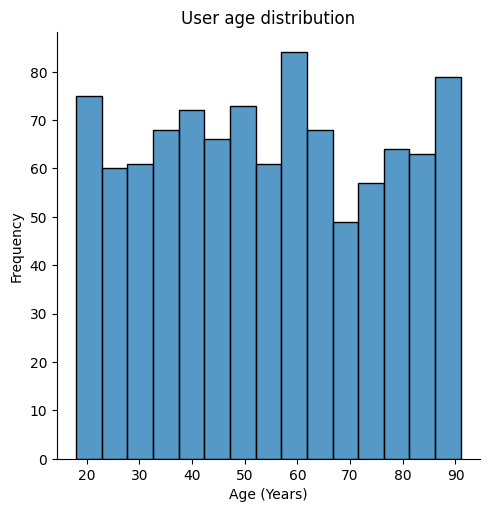

In [56]:
age_graph = sns.displot(my_df, x = "Age (Years)", bins = 15, height = 5)
age_graph.set_axis_labels("Age (Years)", "Frequency", size = 10)
plt.title("User age distribution", size = 12)

Text(0.5, 1.0, 'Probability density plot of Age')

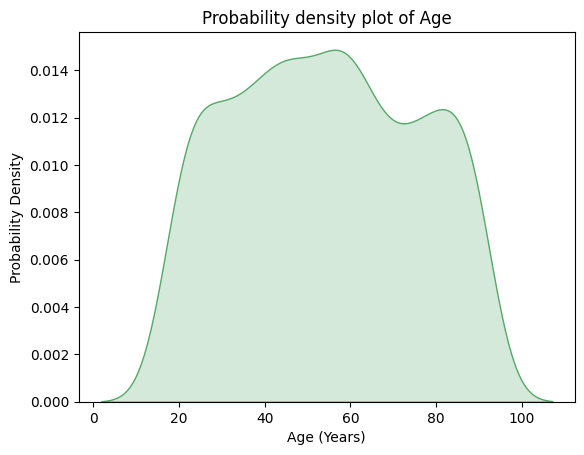

In [57]:
sns.set_color_codes() # (Edwards, 2020)
age_density = sns.kdeplot(my_df, x = "Age (Years)", color = "g", fill = True)
plt.xlabel("Age (Years)")
plt.ylabel("Probability Density")
plt.title("Probability density plot of Age")

## Univariate Plot Task 2b

Text(0.5, 1.0, 'Distribution of the dependants of users')

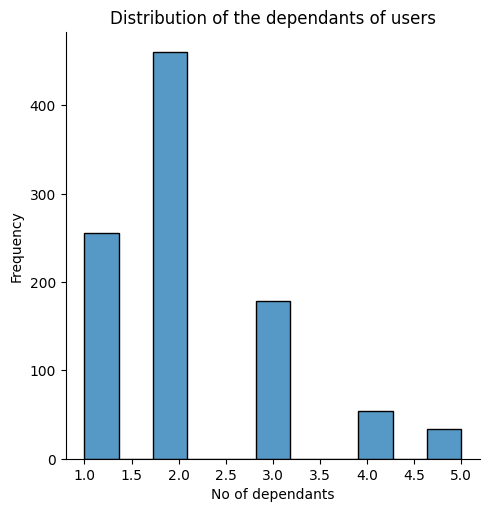

In [58]:
#Evidence suggest that the best practice for handling missing values is through the multiple inputation methods (Alruhaymi and Kim, 2021).
#Because it is unknown whether the missing data is (1) Missing Completely At Random, (2) Missing At Random, or (3) Missing Not At Random, 
#I will use the dropna() technique to handle the miassing values (Keita, 2023)

Dependency = my_df["Dependants"].dropna() # To remove the 19 missing values.

dep_graph = sns.displot(Dependency, height = 5)
dep_graph.set_axis_labels("No of dependants", "Frequency")
plt.title("Distribution of the dependants of users")

Text(0.5, 1.0, 'Probability density plot of Dependants')

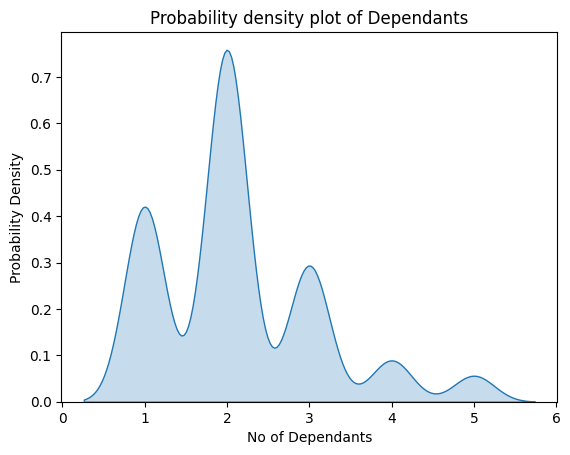

In [59]:
dep_density = sns.kdeplot(Dependency, fill = True)
plt.xlabel("No of Dependants")
plt.ylabel("Probability Density")
plt.title("Probability density plot of Dependants")

## Univariate Plot Task 2c

Text(0.5, 1.0, 'Age distribution by martital status')

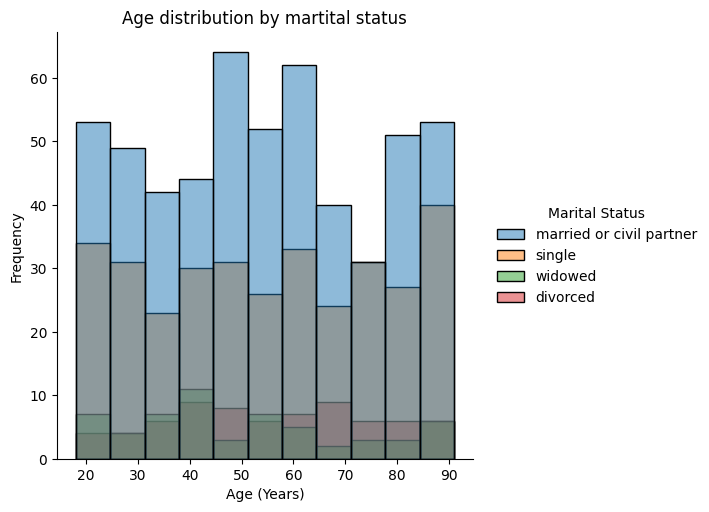

In [60]:
age_marriage = sns.displot(my_df, x = "Age (Years)", hue = "Marital Status", height = 5)
age_marriage.set_axis_labels("Age (Years)", "Frequency")
plt.title("Age distribution by martital status")

## Multivariate Plot Task 3a

In [61]:
# Multivariate plots can be using csatter()

Text(0.5, 1.0, 'Graph of distance commuted against salary')

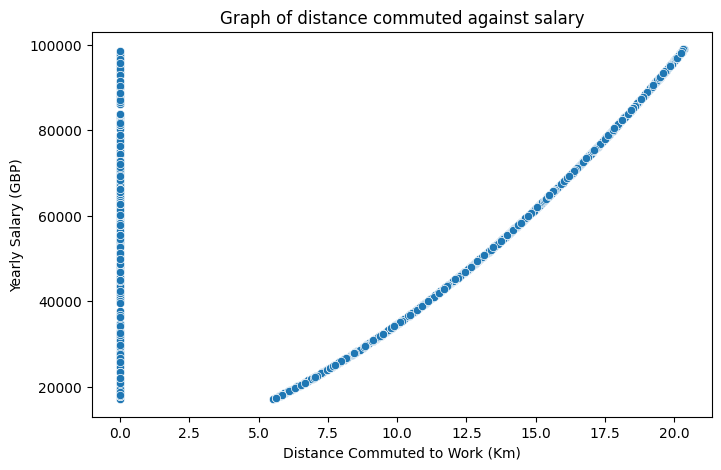

In [62]:
plt.figure(figsize = (8, 5))
dist_salary_graph = sns.scatterplot(data = my_df, x = "Distance Commuted to Work (Km)", y = "Yearly Salary (GBP)")
plt.title("Graph of distance commuted against salary")

## Multivariate Plot Task 3b

Text(0.5, 1.0, 'Graph of Age against salary')

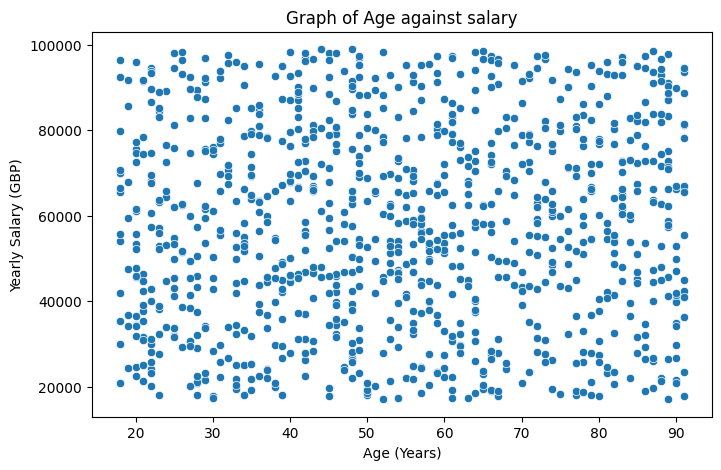

In [63]:
plt.figure(figsize = (8, 5))
age_salary_graph = sns.scatterplot(data = my_df, x = "Age (Years)", y = "Yearly Salary (GBP)")
plt.title("Graph of Age against salary")

## Multivariate Plot Task 3c

Text(0.5, 1.0, 'Graph of user age against salary by dependants')

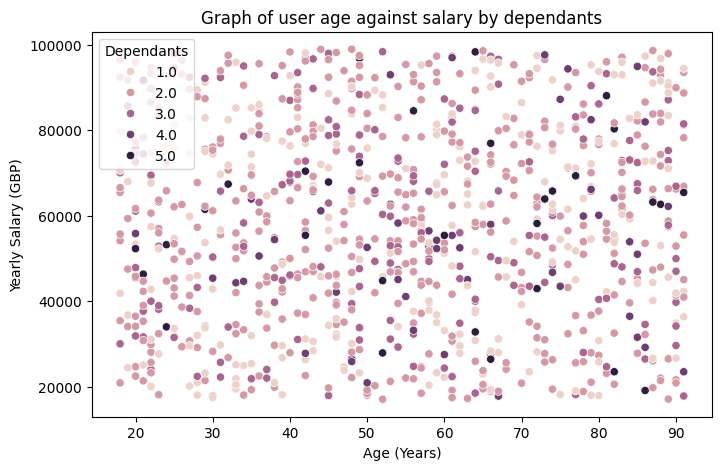

In [64]:
plt.figure(figsize = (8, 5))
age_sal_upondep = sns.scatterplot(data = my_df, x = "Age (Years)", y = "Yearly Salary (GBP)", hue = "Dependants")
plt.title("Graph of user age against salary by dependants")

## Task 4

In [65]:
saved_plots = {}
saved_plots["./age.png"] = age_graph
saved_plots["./agedensity.png"] = age_density
saved_plots["./dependants.png"] = dep_graph
saved_plots["./depdensity.png"] = dep_density
saved_plots["./age_marriage.png"] = age_marriage 
saved_plots["./dist_salary_graph.png"] = dist_salary_graph 
saved_plots["./age_salary_graph.png"] = age_salary_graph
saved_plots["./age_sal_upondep.png"] = age_sal_upondep

for plt_key, plt_value in saved_plots.items():
    plt_value.figure.savefig(plt_key)

# References

### Abba, I.V. (2022) Python Round to Int – How to Round Up or Round Down to the Nearest Whole Number, Freecodecamp. Available online: https://www.freecodecamp.org/news/how-to-round-numbers-up-or-down-in-python/ [Accessed: 15 March 2024].
### lruhaymi, A.Z. and Kim, C.J. (2021) ‘Why Can Multiple Imputations and How (MICE) Algorithm Work?’, Open Journal of Statistics, 11(05), pp. 759–777. Online: https://doi.org/10.4236/ojs.2021.115045 [Accessed: 15 March 2024].
### Bar-Gil, G. (2023) Python Import: Mastering the Advanced Features, Mend.io. Available online: https://www.mend.io/free-developer-tools/blog/python-import-mastering-the-advanced-features/ [Accessed: 16 March 2024].
### Bonthu, H. (2024) How to Read and Write With CSV Files in Python. Available at: https://www.analyticsvidhya.com/blog/2021/08/python-tutorial-working-with-csv-file-for-data-science/ [Accessed: 16 March 2024].
### Ferreira, R.M. (2020) The Ultimate Python Beginner’s Handbook, Freecodecamp. Available online: https://www.freecodecamp.org/news/the-python-guide-for-beginners/#forloops [Accessed: 16 March 2024].
### Gallagher, J. (2023) Python Remove Key from a Dictionary: A Complete Guide: A Complete Guide, Career Karma. Available omline: https://careerkarma.com/blog/python-remove-key-from-a-dictionary/ [Accessed: 16 March 2024].
### Keita, Z. (2023) Top Techniques to Handle Missing Values Every Data Scientist Should Know, Datacamp. Available at: https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values (Accessed: 19 March 2024).
### Markov, M. (2022) Optimal number of bins for a histogram, Medium. Available online: https://medium.com/@maxmarkovvision/optimal-number-of-bins-for-histograms-3d7c48086fde [Accessed: 16 March 2024].
### Python (2024) csv — CSV File Reading and Writing — Python 3.12.2 documentation, Python Software Foundation. Available online: https://docs.python.org/3/library/csv.html [Accessed: 19 March 2024].
### Yanchev, M. (2018) The most (time) efficient ways to import CSV data in Python, Medium. Available online: https://medium.com/casual-inference/the-most-time-efficient-ways-to-import-csv-data-in-python-cc159b44063d [Accessed: 19 March 2024].
### Zaric, D. (2022) Python sort lambda - How to sort with lambda key function in Python, Blogboard Journal. Available online: https://blogboard.io/blog/knowledge/python-sorted-lambda/ [Accessed: 19 March 2024].